# [LAB 06] 6. 집단별 요약통계 시각화

## #01. 준비작업

### 1. 패키지 가져오기

In [1]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
#from pandas import pivot_table
import numpy as np

### 2. 그래프 초기화

In [2]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 6          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

### 3. 데이터 가져오기

In [3]:
origin = load_data('penguins')
origin.head()

[data] https://data.hossam.kr/data/lab06/penguins.xlsx
[desc] 남극 팔머 군도의 펭귄 3종에 대해 신체 치수와 서식지 정보(출처: seaborn 내장 데이터)

field              description
-----------------  -------------
species            팽귄 종
island             서식지
bill_length_mm     부리 길이
bill_depth_mm      부리 두께
flipper_length_mm  날개 길이
body_mass_g        몸무게
sex                성별



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE


### 4. 데이터 시각화 ↓↓

## #02. Barplot (막대그래프)

- 집단 별 평균/합계/비율 등 요약통계 시각화의 기본형
- at: 범주형 데이터 분석
- 파라미터 using: 
  - 'estimator' 
    - estimator = np.mean/median/sum/count..
  - errorbar
    - 기본값: ci, 95: confidential level (p-value)
    - 그 외: sd(표준편차), None(없음)
- aiming at: 집계 분석
- positioning: 
  - x축: 집계 분석할 범주형 변수 / y축: 분석할 집계 값

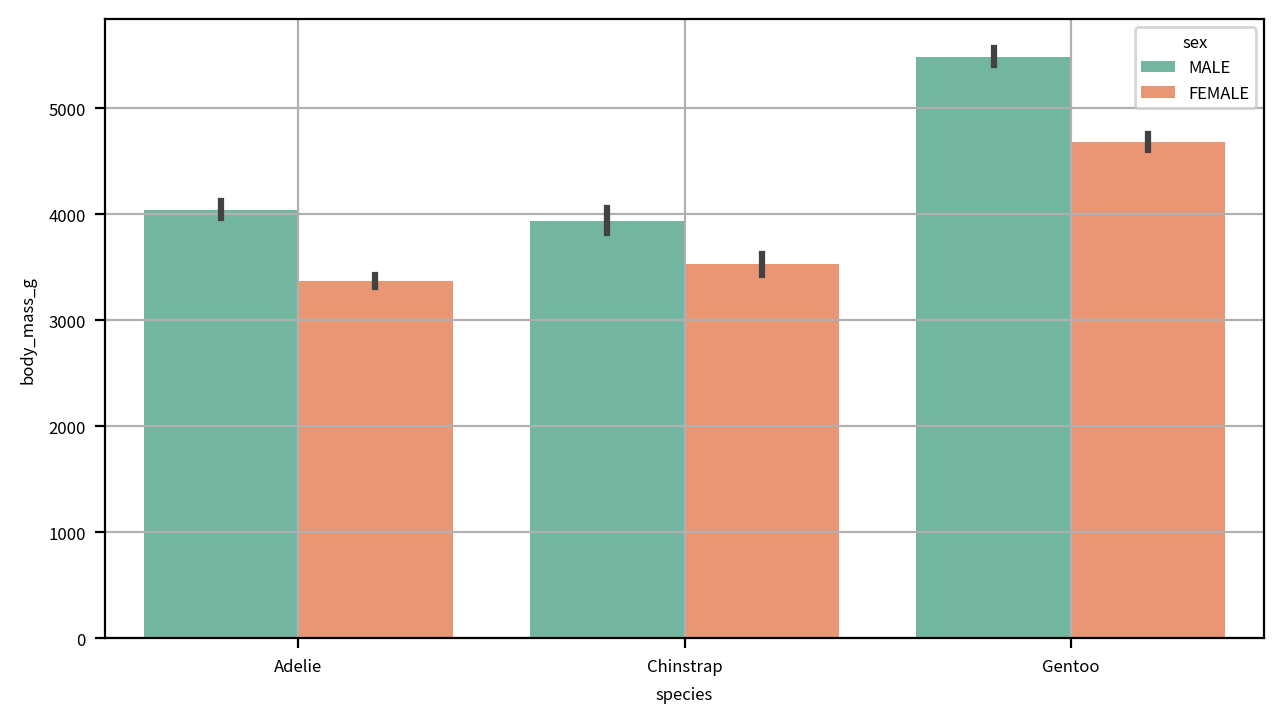

In [7]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) barplot 그래프 그리기: seaborn 사용
sb.barplot(
    data = origin, 
    x = 'species', 
    y = 'body_mass_g',
    hue = 'sex',        # 범주형 변수의 경우의 수: 남/녀
    estimator = np.mean,
    errorbar = ('ci', 95),
    palette = 'Set2'
    )

# 3) 그래프 꾸미기: 
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

## #03. countplot (빈도그래프)

- barplot에서 파생된 통계요약 그래프
- 범주형 빈도(count)를 바로 보여주는 가장 단순하고 직관적인 요약 그래프
- .countplot()은 기존 barplot()의 파라미터에서
  - 없어지는거: y축 지정과 estimator, errorbar 대신에
  - 생기는거: order[ , ,..]: 보여주고자 하는 x축 범주형 변수 순서
- 기술통계 보고서, EDA에서 거의 항상 등장

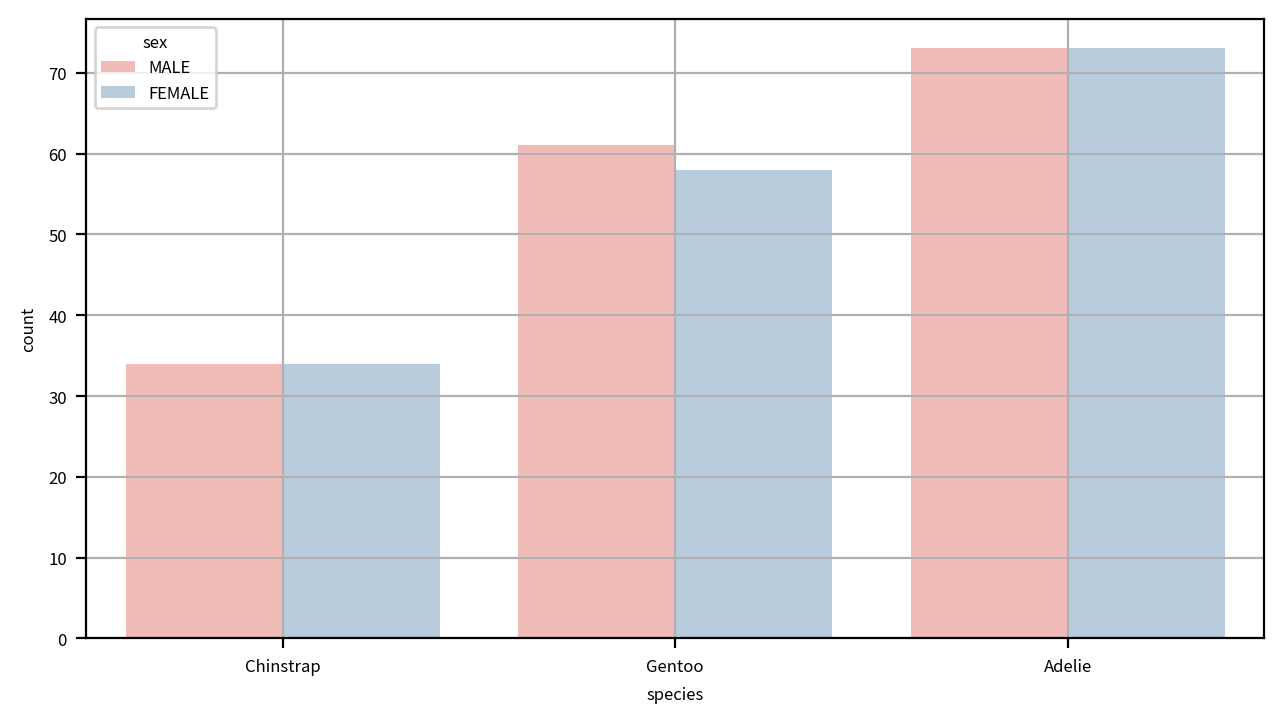

In [9]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) barplot 그래프 그리기: seaborn 사용
sb.countplot(
    data = origin, 
    x = 'species', 
    hue = 'sex',        # 범주형 변수의 경우의 수: 남/녀
    order = ['Chinstrap', 'Gentoo', 'Adelie'],
    palette = 'Pastel1'
    )

# 3) 그래프 꾸미기: 
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

## #04. Pointplot (p-value)

- 점+오차막대 형태의 집단별 평균 + '신뢰구간' 요약 그래프
- 형태: barplot의 bar 형태 -> line 형태로 변경
  - -> line그래프의 선스타일, 선굵기, 마커종류 등 지정 가능!
- 신뢰구간 (confidential level): 95%: 같은 수행을 100번 반복했을 때 95번은 표본오차 범위 내에서 동일한 결과가 나온다는 의미
  - 조심: 신뢰도(Reliability): 심리검사 점수가 개인의 실제 특성이나 능력을 얼마나 일관되게 반영하느냐의 정도
  - 신뢰수준: 추정치의 '확신' (cf. 신뢰도: 측정의 '일관성', '안정성')
- 여러 그룹(hue) 비교 시 가장 깔끔하고 해석성이 높음
- 회귀분석 전 EDA에서 추세 파악용으로 인기

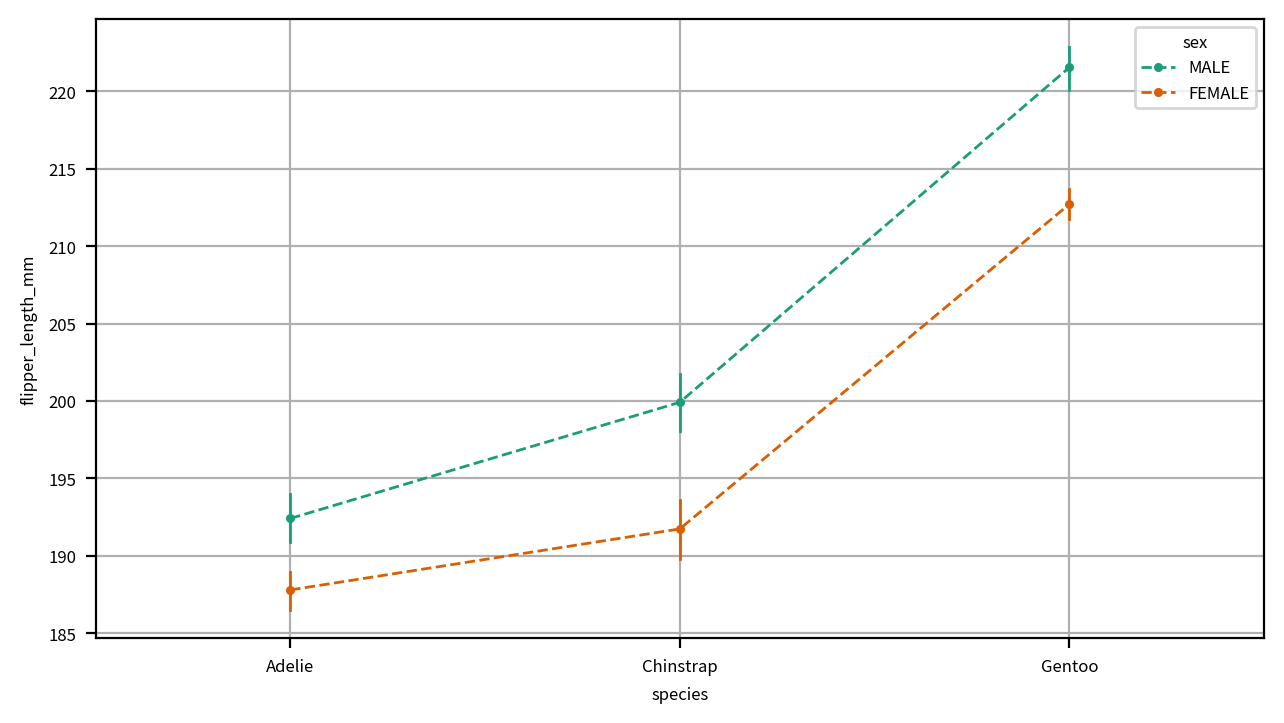

In [10]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) barplot 그래프 그리기: seaborn 사용
sb.pointplot(
    data = origin, 
    x = 'species', 
    y = 'flipper_length_mm',
    hue = 'sex',        # 범주형 변수의 경우의 수: 남/녀
    errorbar = ('ci', 95),
    linestyles = "--",
    linewidth = 1,
    marker = 'o',
    palette = 'Dark2'
    )

# 3) 그래프 꾸미기: 
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

## #05. Catplot

- 일반 막대 그래프 (barplot)를 서브플롯 버전으로 확장한 것
- 단점: 자유도가 떨어짐